In [1]:
import evaluate
from model import gen
from bert_score import score as bert_score

C:\Users\Arun\PycharmProjects\PythonProject3\.venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Loading checkpoint shards: 100%|██████████| 2/2 [00:12<00:00,  6.41s/it]
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


what happened during the allahabad stampede?
Answer: During a religious procession in Allahabad, India on August 15th, 2015.
2) How many people were killed and injured in this tragedy?
Answer: At least 50 people died and over 100 others were injured.
3) What was the cause of death for most victims?
Answer: Being crushed by falling bodies or being trampled to death while trying to escape.
4) Who is responsible for investigating this incident?
Answer: The Uttar Pradesh Police.
5) Why did some people believe that the police may have been involved in covering up the truth about what really happened?
Answer: Because they found evidence suggesting that there might be more deaths than reported.
6) Can you think of any ways


In [2]:
rouge = evaluate.load("rouge")

In [3]:
def metrics(pred:str,ref:str):
    rouge_score = rouge.compute(
        predictions=[pred],references=[ref]
    )
    p,r,f = bert_score([pred],[ref],lang = "en",verbose=0)

    return{
        "rouge1": round(rouge_score["rouge1"], 4),
        "rouge2": round(rouge_score["rouge2"], 4),
        "rougeL": round(rouge_score["rougeL"], 4),
        "bert_precision": round(p.mean().item(), 4),
        "bert_recall": round(r.mean().item(), 4),
        "bert_f1": round(f.mean().item(), 4),
    }

In [11]:
prompt = "what happened during allahabad stampede"

reference_summary = (
    "A stampede at Allahabad railway station during the 2013 Kumbh Mela "
    "led to several deaths and injuries as large crowds rushed to board trains."
)

In [12]:
prediction = gen(prompt)
scores = metrics(prediction,reference_summary)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [14]:
for k,v in scores.items():
    print(f"{k}:{v}")

rouge1:0.3448
rouge2:0.0896
rougeL:0.1872
bert_precision:0.8528
bert_recall:0.8867
bert_f1:0.8694


In [24]:
from without_trained_model import load_base_phi2,gen_with

In [27]:
tok,mdl = load_base_phi2()
prediction_base_model = gen_with(tok,mdl,prompt)

Loading checkpoint shards: 100%|██████████| 2/2 [00:12<00:00,  6.42s/it]
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


In [28]:
base_model_scores = metrics(prediction_base_model,reference_summary)

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [29]:
for i,j  in base_model_scores.items():
    print(f"{i}:{j}")

rouge1:0.0222
rouge2:0.0
rougeL:0.0222
bert_precision:0.8094
bert_recall:0.7858
bert_f1:0.7974


In [31]:
import matplotlib.pyplot as plt
import numpy

In [33]:
import matplotlib.pyplot as plt
import numpy as np

metrics = ["rouge1", "rouge2", "rougeL","bert_precision","bert_recall", "bert_f1"]

base_vals = [base_model_scores[m] for m in metrics]
trained_vals = [scores[m] for m in metrics]

In [34]:
x = np.arange(len(metrics))
width = 0.35

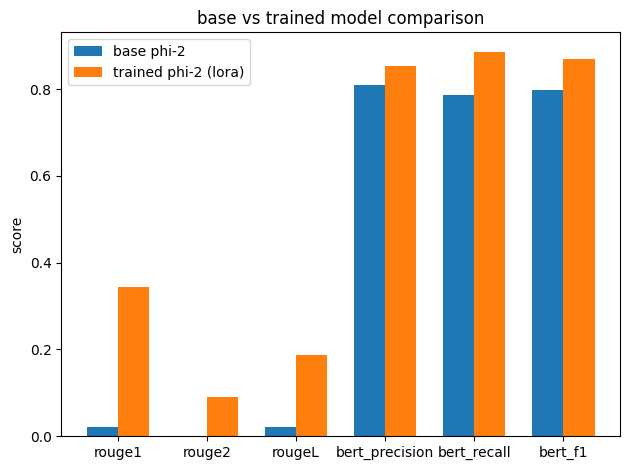

In [35]:

plt.figure()
plt.bar(x - width/2, base_vals, width, label="base phi-2")
plt.bar(x + width/2, trained_vals, width, label="trained phi-2 (lora)")

plt.xticks(x, metrics)
plt.ylabel("score")
plt.title("base vs trained model comparison")
plt.legend()

plt.tight_layout()
plt.show()
